# Projeto: Previsão do preço de casas

Caso: Prever o preço da casa usando regressão

Link: https://www.kaggle.com/harlfoxem/housesalesprediction

Dados: Preços de casas vendidas de King County, em Seattle, entre maio de 2014 e maio de 2015.

# Etapa 1: Importação das bibliotecas

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.6.0'

# Etapa 2: Importação da base de dados

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
house_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Python Outros/kc-house-data.csv', encoding = 'ISO-8859-1')

In [4]:
house_df

id             date  ...  sqft_living15  sqft_lot15
0      7129300520  20141013T000000  ...           1340        5650
1      6414100192  20141209T000000  ...           1690        7639
2      5631500400  20150225T000000  ...           2720        8062
3      2487200875  20141209T000000  ...           1360        5000
4      1954400510  20150218T000000  ...           1800        7503
...           ...              ...  ...            ...         ...
21608   263000018  20140521T000000  ...           1530        1509
21609  6600060120  20150223T000000  ...           1830        7200
21610  1523300141  20140623T000000  ...           1020        2007
21611   291310100  20150116T000000  ...           1410        1287
21612  1523300157  20141015T000000  ...           1020        1357

[21613 rows x 21 columns]

In [5]:
house_df.head()

id             date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0  ... -122.257           1340        5650
1  6414100192  20141209T000000  538000.0  ... -122.319           1690        7639
2  5631500400  20150225T000000  180000.0  ... -122.233           2720        8062
3  2487200875  20141209T000000  604000.0  ... -122.393           1360        5000
4  1954400510  20150218T000000  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]

In [6]:
house_df.tail(10)

id             date  ...  sqft_living15  sqft_lot15
21603  7852140040  20140825T000000  ...           2270        5731
21604  9834201367  20150126T000000  ...           1400        1230
21605  3448900210  20141014T000000  ...           2520        6023
21606  7936000429  20150326T000000  ...           2050        6200
21607  2997800021  20150219T000000  ...           1330        1265
21608   263000018  20140521T000000  ...           1530        1509
21609  6600060120  20150223T000000  ...           1830        7200
21610  1523300141  20140623T000000  ...           1020        2007
21611   291310100  20150116T000000  ...           1410        1287
21612  1523300157  20141015T000000  ...           1020        1357

[10 rows x 21 columns]

In [7]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
house_df.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.161300e+04  2.161300e+04  ...   21613.000000   21613.000000
mean   4.580302e+09  5.400881e+05  ...    1986.552492   12768.455652
std    2.876566e+09  3.671272e+05  ...     685.391304   27304.179631
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.219500e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

# Etapa 3: Visualização dos dados

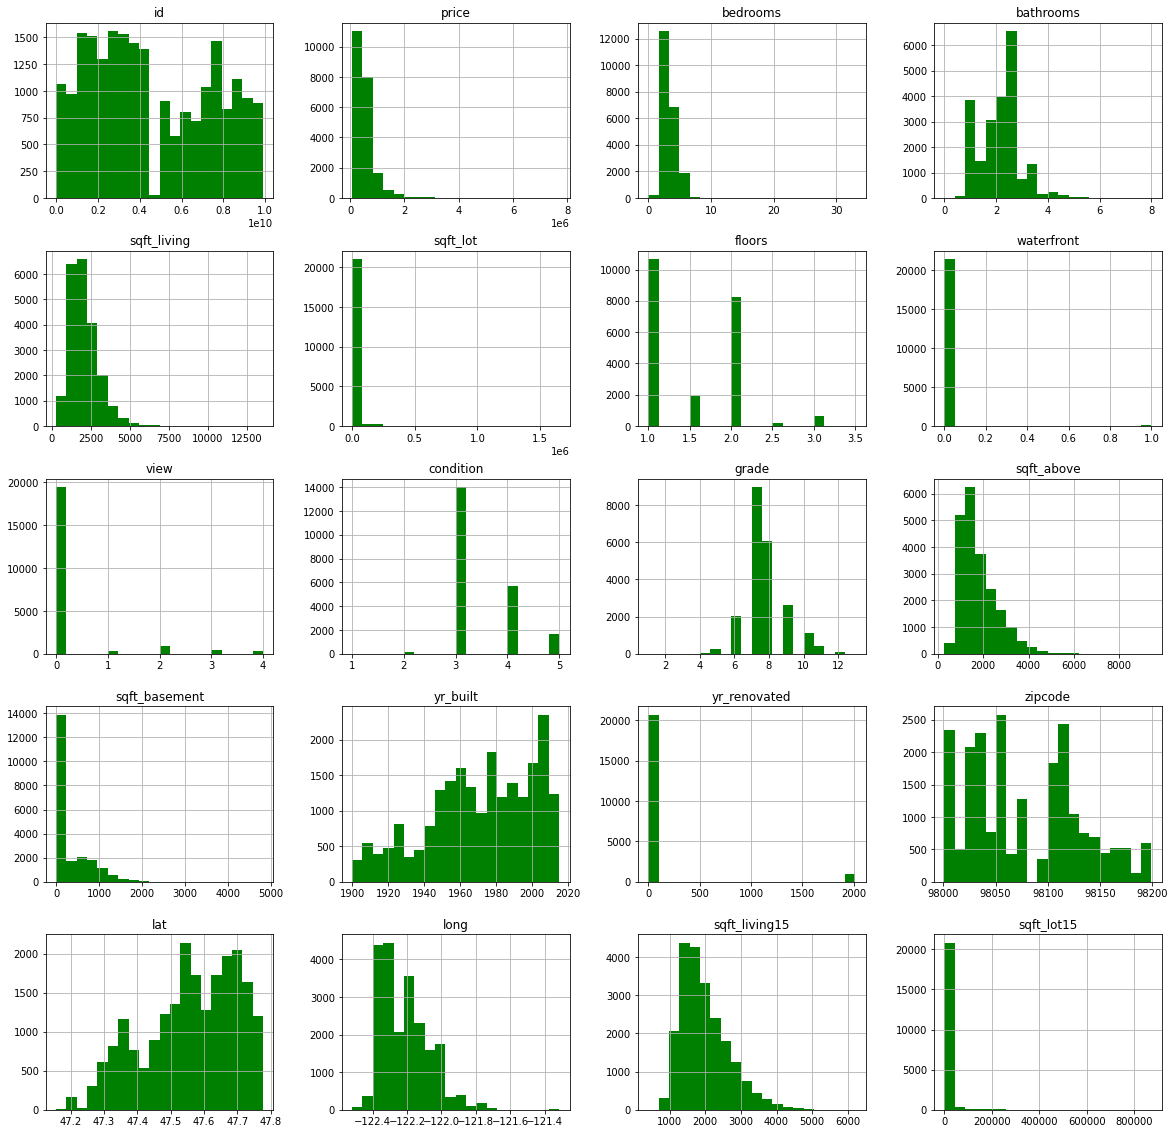

In [9]:
house_df.hist(bins = 20, figsize = (20,20), color = 'g');

In [10]:
sns.pairplot(house_df);

Output hidden; open in https://colab.research.google.com to view.

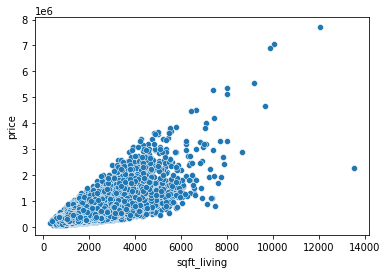

In [13]:
sns.scatterplot(x = 'sqft_living', y = 'price', data = house_df);

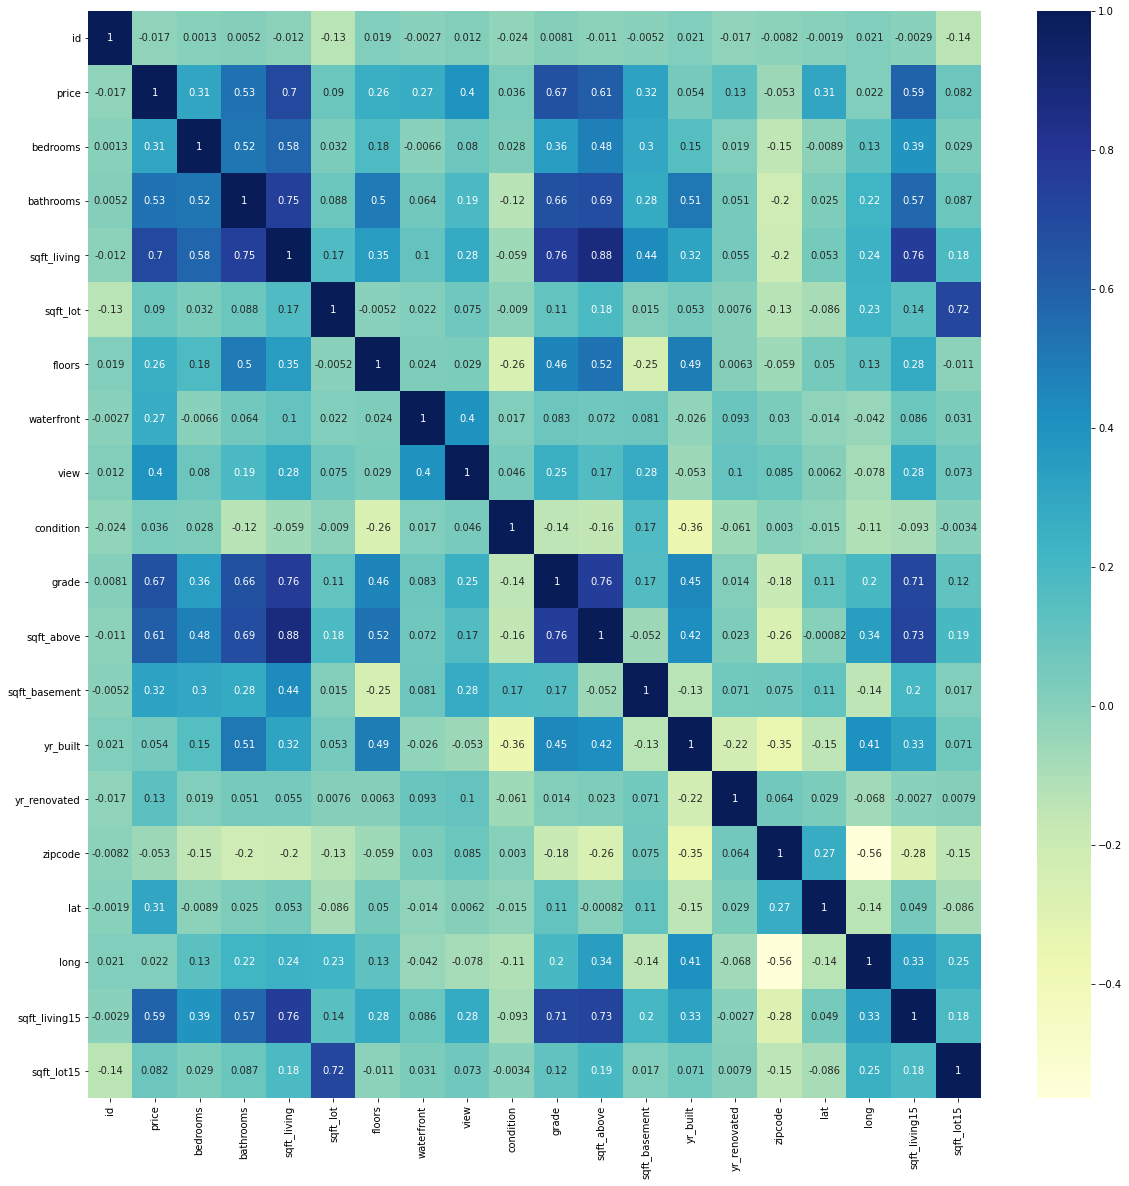

In [14]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(house_df.corr(), annot = True, cmap="YlGnBu");

# Etapa 4: Tratamento da base de dados

## 4.1: Tratamento da base de dados

In [15]:
selected_features = ['sqft_living']

In [16]:
X = house_df[selected_features]

In [17]:
X.head()

sqft_living
0         1180
1         2570
2          770
3         1960
4         1680

In [18]:
y = house_df['price']

In [19]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [20]:
X.shape

(21613, 1)

In [21]:
y.shape

(21613,)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_scaled

array([[0.06716981],
       [0.17207547],
       [0.03622642],
       ...,
       [0.05509434],
       [0.09886792],
       [0.05509434]])

In [24]:
X_scaled.shape

(21613, 1)

In [25]:
scaler.data_max_

array([13540.])

In [26]:
scaler.data_min_

array([290.])

In [27]:
y = y.values.reshape(-1,1)

In [28]:
y.shape

(21613, 1)

In [29]:
y_scaled = scaler.fit_transform(y)

In [30]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

## 4.2: Criação do dataset de treino (75%) e teste (25%)

In [31]:
from sklearn.model_selection import train_test_split
np.random.seed(0) 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [32]:
X_train.shape

(16209, 1)

In [33]:
X_train

array([[0.05056604],
       [0.09207547],
       [0.10415094],
       ...,
       [0.15622642],
       [0.15698113],
       [0.15773585]])

In [34]:
X_train[1]

array([0.09207547])

In [35]:
X_test.shape

(5404, 1)

In [36]:
X_test

array([[0.08603774],
       [0.33056604],
       [0.08679245],
       ...,
       [0.2354717 ],
       [0.06716981],
       [0.10037736]])

# Etapa 5: Construção da Rede Neural e criação do modelo

In [37]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(1, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer='Adam', loss='mean_squared_error')


In [40]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 2s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 2/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 3/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 6/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 7/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 8/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 9.9581e-04
Epoch 9/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 10/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0011 - va

# Etapa 6: Avaliação do modelo 

## 6.1: Exibir a progressão do erro

In [41]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

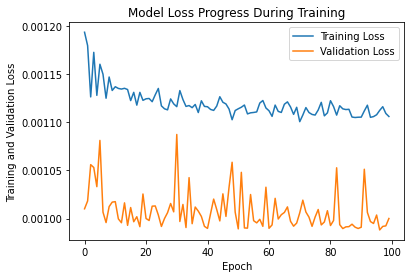

In [42]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss']);

## 6.3 Avaliação do dataset de teste (criado lá em cima)
Vou aplicar o modelo no dataset desconhecido e ver se acertou (preciso gerar o accuracy depois!!)

In [43]:
X_test.shape

(5404, 1)

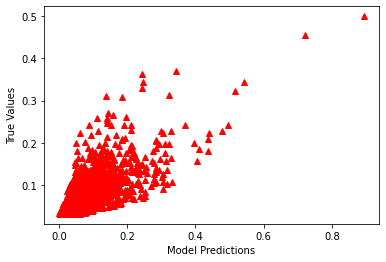

In [44]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values');

In [45]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

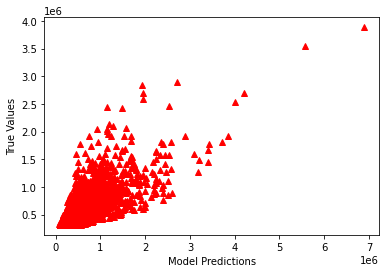

In [46]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [47]:
k = X_test.shape[1]
n = len(X_test)
n

5404

In [48]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 251810.894 
MSE = 63408726164.99926 
MAE = 170187.40495466322 
R2 = 0.5226705393170702 
Adjusted R2 = 0.5225821776990245
